# Orders - Multivariate Regression of review_score

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
''' You can download the solution for yesterday's optional distance_seller_customer function from Kitt 
and paste it into your olist/orders.py file, if you weren't able to complete it '''
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96525 entries, 0 to 96532
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  96525 non-null  object 
 1   wait_time                 96525 non-null  float64
 2   expected_wait_time        96525 non-null  int64  
 3   delay_vs_expected         96525 non-null  float64
 4   order_status              96525 non-null  object 
 5   dim_is_five_star          96525 non-null  int64  
 6   dim_is_one_star           96525 non-null  int64  
 7   review_score              96525 non-null  int64  
 8   number_of_products        96525 non-null  int64  
 9   number_of_sellers         96525 non-null  int64  
 10  price                     96525 non-null  float64
 11  freight_value             96525 non-null  float64
 12  distance_seller_customer  96525 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 10.3+ MB


In [5]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,96525.000000,96525.000000,96525.00000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000
mean,12.090743,23.380679,0.76460,0.588977,0.100596,4.142005,1.142699,1.142699,136.935472,22.773011,601.058677
std,9.545650,8.767081,4.73508,0.492022,0.300794,1.296748,0.540518,0.540518,208.935017,21.553810,595.216682
min,0.000000,2.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.000000,18.000000,0.00000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.830000,187.358391
50%,10.000000,23.000000,0.00000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000,434.070859
75%,15.000000,28.000000,0.00000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.000000,797.860262
max,209.000000,155.000000,189.00000,1.000000,1.000000,5.000000,21.000000,21.000000,13440.000000,1794.960000,8736.947618


Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

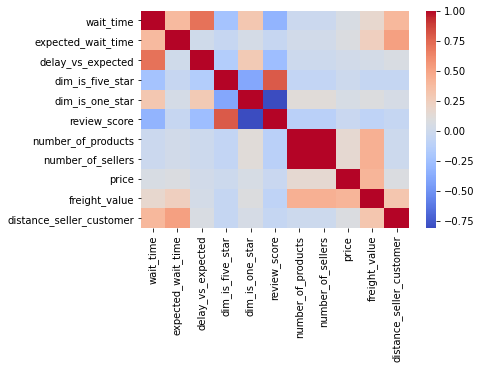

In [6]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.933311678529282)

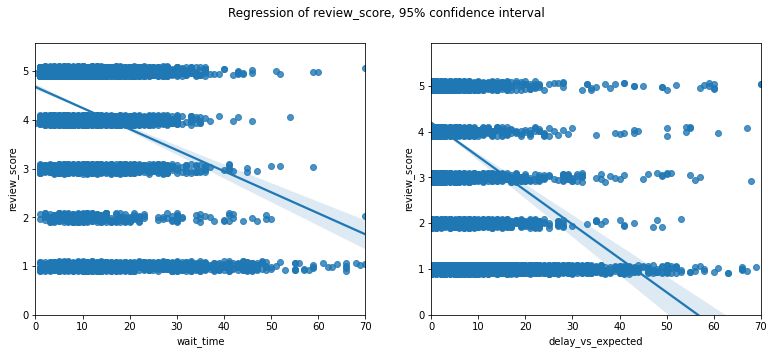

In [7]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

In [8]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.382769,0.705804,-0.235160,0.306295,-0.334931,-0.019302,-0.019302,0.055787,0.166976,0.392985
expected_wait_time,0.382769,1.000000,0.006359,-0.050189,0.034731,-0.052176,0.016050,0.016050,0.076327,0.239133,0.513858
delay_vs_expected,0.705804,0.006359,1.000000,-0.156504,0.281957,-0.270601,-0.013162,-0.013162,0.016995,0.024152,0.066085
dim_is_five_star,-0.235160,-0.050189,-0.156504,1.000000,-0.400339,0.792041,-0.073181,-0.073181,-0.013813,-0.059535,-0.056552
dim_is_one_star,0.306295,0.034731,0.281957,-0.400339,1.000000,-0.810337,0.120458,0.120458,0.046013,0.084189,0.043521
review_score,-0.334931,-0.052176,-0.270601,0.792041,-0.810337,1.000000,-0.124262,-0.124262,-0.035811,-0.091034,-0.059232
number_of_products,-0.019302,0.016050,-0.013162,-0.073181,0.120458,-0.124262,1.000000,1.000000,0.153992,0.439729,-0.016683
number_of_sellers,-0.019302,0.016050,-0.013162,-0.073181,0.120458,-0.124262,1.000000,1.000000,0.153992,0.439729,-0.016683
price,0.055787,0.076327,0.016995,-0.013813,0.046013,-0.035811,0.153992,0.153992,1.000000,0.411600,0.079705
freight_value,0.166976,0.239133,0.024152,-0.059535,0.084189,-0.091034,0.439729,0.439729,0.411600,1.000000,0.313953


In [9]:
print('R-Squared = ', (orders.corr()['review_score']['wait_time'])**2)

R-Squared =  0.11217880408701221


In [10]:
print('R-Squared = ', (orders.corr()['review_score']['delay_vs_expected'])**2)

R-Squared =  0.07322514881626195


## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, Print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric R-squared, as well as individual regression coefficients, t-values, p-values, and 95% confidence intervals

In [21]:
import statsmodels.formula.api as smf

In [22]:
model1 = smf.ols(formula = 'review_score ~ wait_time', data=orders).fit()

In [23]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.220e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        23:03:16   Log-Likelihood:            -1.5630e+05
No. Observations:               96525   AIC:                         3.126e+05
Df Residuals:                   96523   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6921      0.006    739.297      0.0

In [24]:
import statsmodels.api as sm

In [26]:
y = orders['review_score'].copy()

In [40]:
X = orders[['wait_time']]
X

,wait_time
0,8.0
1,13.0
2,9.0
3,13.0
4,2.0
...,...
96528,8.0
96529,22.0
96530,24.0
96531,17.0


In [45]:
X.loc[:, 'constant'] = 1
X

/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,wait_time,constant
0,8.0,1
1,13.0,1
2,9.0,1
3,13.0,1
4,2.0,1
...,...,...
96528,8.0,1
96529,22.0,1
96530,24.0,1
96531,17.0,1


In [42]:
model11 = sm.OLS(y, X).fit()

In [43]:
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.220e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        23:09:16   Log-Likelihood:            -1.5630e+05
No. Observations:               96525   AIC:                         3.126e+05
Df Residuals:                   96523   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wait_time     -0.0455      0.000   -110.435      0.0

In [14]:
model2 = smf.ols(formula = 'review_score ~ delay_vs_expected', data=orders).fit()

In [15]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7626.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:            -1.5838e+05
No. Observations:               96525   AIC:                         3.168e+05
Df Residuals:                   96523   BIC:                         3.168e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1987      0.00

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [16]:
model3 = smf.ols(formula = 'review_score ~ wait_time + delay_vs_expected', data=orders).fit()

In [17]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6241.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:            -1.5618e+05
No. Observations:               96525   AIC:                         3.124e+05
Df Residuals:                   96522   BIC:                         3.124e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6274      0.00

In [18]:
model3.params

Intercept            4.627382
wait_time           -0.038964
delay_vs_expected   -0.018666
dtype: float64

----
❓Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **partial correlation** coefficients. Can you notice the difference with the **simple regression** coeffients computed with seaborn above? What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


<details>
    <summary>💡 Solution</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❓ R-squared is quite low: no more than 12% of the variation of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more features to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not create **data leaks**: do not add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear with each other
    - Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [19]:
# Select features
selected_orders_features = orders[['review_score','wait_time','delay_vs_expected','number_of_products','distance_seller_customer']]
selected_orders_features.head(3)

,review_score,wait_time,delay_vs_expected,number_of_products,distance_seller_customer
0,4,8.0,0.0,1,18.063837
1,4,13.0,0.0,1,856.292580
2,5,9.0,0.0,1,514.130333


In [20]:
# standardize features (transform them into their respective z-scores)
from scipy import stats
selected_orders_features = selected_orders_features.apply(stats.zscore)
selected_orders_features.head(3)

,review_score,wait_time,delay_vs_expected,number_of_products,distance_seller_customer
0,-0.109509,-0.428548,-0.161476,-0.264005,-0.979472
1,-0.109509,0.095254,-0.161476,-0.264005,0.428811
2,0.661655,-0.323787,-0.161476,-0.264005,-0.146046


In [21]:
stats.zscore(selected_orders_features['distance_seller_customer'])

array([-0.97947164,  0.4288106 , -0.14604563, ...,  0.6165728 ,
       -0.38794783,  0.05167743])

In [22]:
# Create and train model4
model4 = smf.ols(formula = 'review_score ~ wait_time + delay_vs_expected + \
                            number_of_products + distance_seller_customer',\
                    data = selected_orders_features).fit()

In [23]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     3794.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        15:51:36   Log-Likelihood:            -1.2992e+05
No. Observations:               96525   AIC:                         2.598e+05
Df Residuals:                   96520   BIC:                         2.599e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [24]:
#selected_orders_features.plot(kind='bar')

<details>
    <summary>💡Explanations</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance also plays a role.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   
Plot the `residuals` in a histogram.

In [36]:
predicted_review_score = model4.predict(selected_orders_features)
residuals = predicted_review_score - selected_orders_features['review_score']
residuals, print(f'Mean of residuals = {residuals.mean()}')

Mean of residuals = -3.820478423822761e-17


(0        0.222403
 1        0.149433
 2       -0.521909
 3       -0.499760
 4       -0.332731
            ...   
 96528   -0.542272
 96529   -0.220551
 96530   -1.000880
 96531    1.246759
 96532   -0.435557
 Length: 96525, dtype: float64,
 None)

<AxesSubplot:ylabel='Count'>

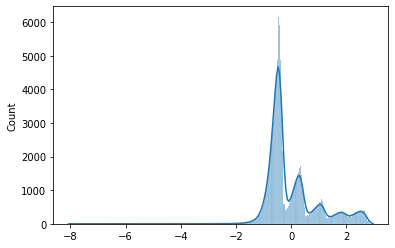

In [34]:
# visual check
sns.histplot(residuals, kde=True, edgecolor='w')

❓ Can you guess why the residual distplot is such a strange shape? To understand, plot on the same axis the histogram of `review_score` as well as that of the `predicted_review_score` for each row of the dataset

Text(0.5, 1.0, 'Review_score')

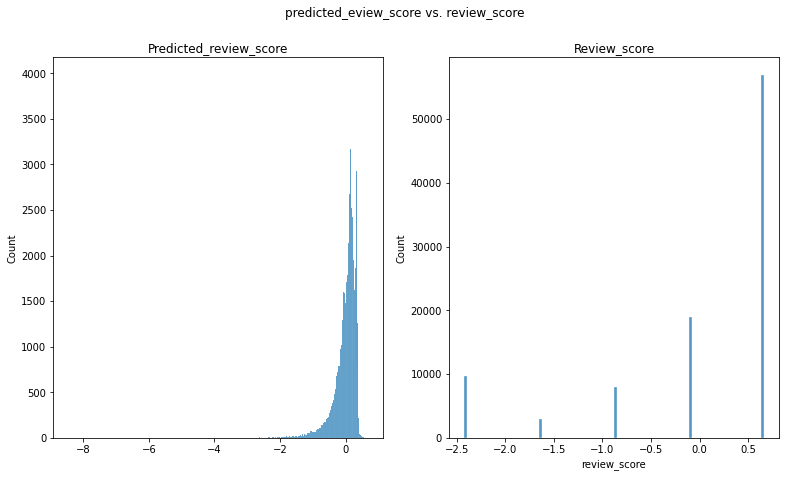

In [44]:
plt.figure(figsize=(13,7))
plt.suptitle('predicted_eview_score vs. review_score')

plt.subplot(1,2,1)
sns.histplot(predicted_review_score, kde=False, edgecolor='w')
plt.title("Predicted_review_score")

plt.subplot(1,2,2)
sns.histplot(selected_orders_features['review_score'], kde=False, edgecolor='w')
plt.title("Review_score")

<details>
    <summary>💡Explanations</summary>

☝️ Our model is not so great, for two reasons
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Secondly, because we are trying to fit a "linear regression" function to a discreet classification problem

Tomorrow, you will discover a new model: the logistic regression classifier
    
</details>

🏁 Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done